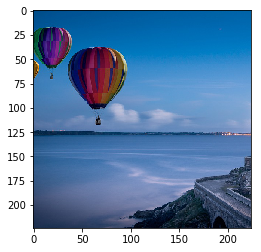

150528
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
___

In [9]:
import keras
from keras.layers import Flatten,Dense
from keras.preprocessing.image import array_to_img,load_img,img_to_array
from keras.models import Model
from keras.applications import imagenet_utils,vgg16,resnet50

import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline


img_path='balloon-1.jpg'
img=load_img(img_path)
plt.imshow(img)


def preprocess_img(img_path):
    
    img=load_img(img_path)
    width,height=img.size
    
    im_height_n=224

    im_width_n=int(width*im_height_n/height)
    desired_width, desired_height = 224, 224
    
    img = img.resize((im_width_n, im_height_n))
    #img=img_to_array(img)
    #img = array_to_img(img, scale=False)
    #plt.imshow(img)
    #plt.show()
    if im_width_n < desired_width:
        desired_width = im_width_n
    start_x = np.maximum(0, int(im_width_n-desired_width)/2)
    start_y= np.maximum(0, int(im_height_n-desired_height)/2)

    img = img.crop((start_x, start_y, start_x+desired_width, start_y+desired_height))
    #plt.imshow(img)
    #plt.show()
    img = img.resize((224, 224))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    
    print(img.size)
    img=np.expand_dims(img,axis=0)  #add one dimension to get 1,width,height for batch size
    img=vgg16.preprocess_input(img)
    return img

input_img=preprocess_img(img_path)


model_vgg16=vgg16.VGG16(input_shape=(224,224,3),include_top=True,weights='imagenet')

result=model_vgg16.predict(input_img)
result_arg=result.argmax()
result_decoded=imagenet_utils.decode_predictions(result,top=10)

#weight 

model_vgg16.summary()

vgg16_last_conv=model_vgg16.get_layer('block5_conv3')
model_vgg16_last_conv=Model(inputs=model_vgg16.input,outputs=vgg16_last_conv.output)

layer_512=model_vgg16_last_conv.predict(input_img)  #activation 512 filters

layer_512

In [6]:
imagenet_utils.decode_predictions(result,top=10)[0][0]

('n02782093', 'balloon', 0.99991703)

In [33]:
print(result.argmax())

417
